In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

path = "Resources/myopia.csv"
from pathlib import Path


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf


# Supervised learning investigation

In [2]:
# make the choice of randomiser explicit:
sample_hold = 42

In [3]:
# re-read the data 
myopia_df = pd.read_csv(path)
myopia_df.shape

(618, 15)

In [4]:
# Split the data into X_train, X_test, y_train, y_test
y = myopia_df['MYOPIC']

X = myopia_df.drop(columns=['MYOPIC'])


print("Shape: ", X.shape, y.shape)

Shape:  (618, 14) (618,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)

In [6]:
# Train a Random Forest Classifier model and print the model score

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)


LogisticRegression()

In [8]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8898488120950324
Testing Data Score: 0.8903225806451613


In [9]:
target_names = ["0", "1"]

In [10]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       137
           1       0.40      0.11      0.17        18

    accuracy                           0.88       155
   macro avg       0.65      0.54      0.55       155
weighted avg       0.84      0.88      0.85       155

Training Score: 1.0
Testing Score: 0.8774193548387097


# Conclusion

Both methods came down with a similar score of 89.0% for Logistic Regression and 87.7% for the Random Forest - a fairly high confidence rate of predicting Myopia.

However, The random forest entirely over-fitted the training data, realising 100% accurary. Since it could not replicate this in testing, this is a disadvantage.

The logistic regression model performed just as well on the training data, also rounding to 89.0% accuracy. This shows how it had generalised very well from it's training.

Overall,while the two models performed very similarly for this data, I would therefore use the Logistic Regression model. While it was barely better than the random forest method overall, it did not over-fit the training data, and I therefore find it more trustworthy.

# Unsupervised learning investigation
## Part One: 
### Data Preparation

In [11]:
myopia_df = pd.read_csv(path)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [12]:
myopia_df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


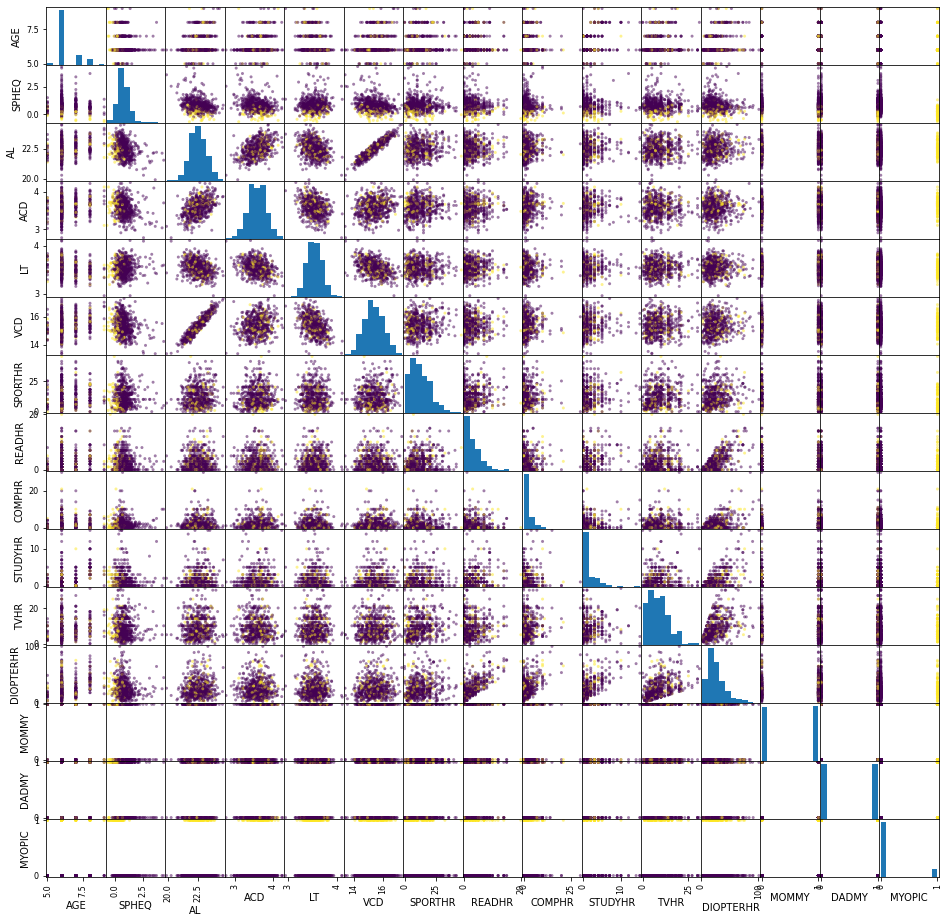

In [13]:
pd.plotting.scatter_matrix(myopia_df, c=myopia_df["MYOPIC"], figsize=(16,16))
plt.savefig("1.png", format="png")

In [14]:
myopia_df_unsuper = myopia_df.drop(columns=["MYOPIC"])
myopia_df_unsuper

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [15]:
for column in myopia_df_unsuper.columns:
    print(f"Column {column} has {myopia_df_unsuper[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [16]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(myopia_df_unsuper))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


## Part Two: 
### Dimensionality Reduction

In [17]:
# Initialize PCA model for 90% explained variance
pca = PCA(n_components=0.9)

# Get two principal components for the data.
pcaX = pd.DataFrame(pca.fit_transform(X))
pcaX

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [18]:
pcaX.shape

(618, 10)

In [19]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pcaX)
TSNE_DF = pd.DataFrame(tsne_features)
TSNE_DF = TSNE_DF.rename(columns={0: "X", 1: "Y"})

In [20]:
TSNE_DF

,X,Y
0,13.909317,2.146400
1,-21.963413,0.670567
2,3.989051,-20.337908
3,-2.302917,16.579258
4,-3.358467,-6.588262
...,...,...
613,14.013738,8.462007
614,-21.895254,0.071388
615,-22.524343,-1.121190
616,15.441012,-22.558287


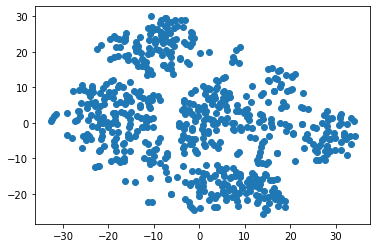

In [21]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y)

## Part Three: 
### Cluster Analysis 

In [22]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(TSNE_DF)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\David\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,260939.546875
1,2,129973.765625
2,3,93614.679688
3,4,62352.394531
4,5,42743.000000
5,6,35114.683594
6,7,29651.285156
7,8,25935.757812
8,9,23275.558594
9,10,20769.054688


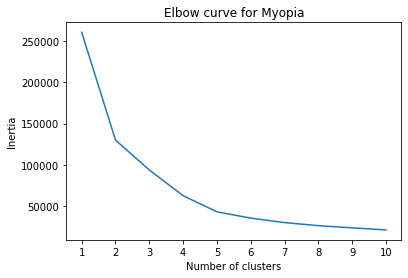

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

 The data appear to have an elbow point at k=5.

In [24]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [25]:
clusters = get_clusters(5, TSNE_DF)

In [26]:
clusters

,X,Y,class
0,13.909317,2.146400,0
1,-21.963413,0.670567,2
2,3.989051,-20.337908,4
3,-2.302917,16.579258,1
4,-3.358467,-6.588262,0
...,...,...,...
613,14.013738,8.462007,0
614,-21.895254,0.071388,2
615,-22.524343,-1.121190,2
616,15.441012,-22.558287,4


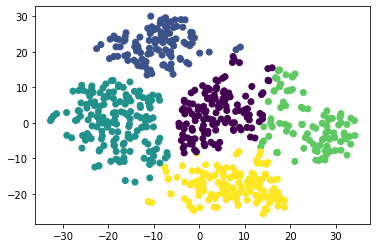

In [27]:
plt.scatter(x=clusters.X, y=clusters.Y, c=clusters["class"])

## Part Four: 
### Conclusion

It appears the patients can indeed by clustered into roughly five clusters, as demonstrated above.

However, by colouring the same chart with the original Myopia data, as demonstrated below, we can see that whether or not a person is infact Myopic does not seem to connect to these clusters. It seems that these clusters point to some other interesting feature of the data that will be interesting to explore further.

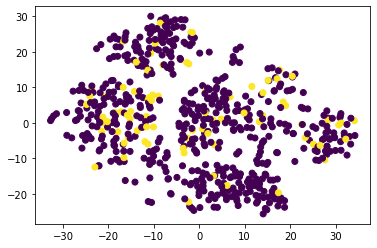

In [28]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y, c=myopia_df.MYOPIC)

# Neural Network

In [29]:
input_dimensions=X.shape[1]
input_dimensions

14

In [30]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


In [31]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=input_dimensions))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [33]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    overwrite=True,
    max_epochs=20,
    hyperband_iterations=2,)

In [34]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 03s]
val_accuracy: 0.9032257795333862

Best val_accuracy So Far: 0.9096774458885193
Total elapsed time: 00h 01m 41s
INFO:tensorflow:Oracle triggered exit


In [35]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 6,
 'num_layers': 2,
 'units_0': 26,
 'units_1': 91,
 'units_2': 91,
 'units_3': 1,
 'units_4': 41,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [36]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.4170 - accuracy: 0.9097 - 261ms/epoch - 52ms/step
Loss: 0.41701093316078186, Accuracy: 0.9096774458885193


## Neural Network Conclusion
A Neural network model has been found that achieves 91.0% accuracy.

# Overall Conclusion
To summarise: 

Supervised learning found that whilst both Logistic Regression and Random Forests performed equally well on the test data, the Random Forest ensemble method over-fitted the training data and I would therefore prefer to use the logistic regression of the two.

Unsupervised learning found that the data can be grouped into five rough clusters, although these clusters point to some as-yet unexplored feature of the data unrelated to myopia itself.

The auto-tune found a Neural Network that achieved the highest accuracy of 91.0%, which in this case, works out as the most accurate model we have for the data.

However, The dataset itself could be improved by introducing the degree to which myopia affects individuals, rather than being a binary classification problem. If we could have access to more detailed scores such as a measure of visual acuity, then perhaps we could find an even more useful model.